Modified from online source
For this one file, for the purpose of practice, DO NOT search for the answer.


Modified by Ye

Prerequisite, understand google colab. You should have gone through the google colab tutorial.



Prequisite #2, know some programming language. If you don't know python yet, watch this https://www.youtube.com/watch?v=kqtD5dpn9C8

Sometimes in our code (and our life), things are broken, we may try to fix them.

Sometimes things are beyond fixing, we just live with it.

OK, so we decide on building a rudimentary, non-UI version connect4.

We are going to import numpy package, and use it to create a matrix of 6 rows and 7 columns, representing the game board. We will use ```0```s to represent empty spaces, ```1```s to represent pieces from player 1 and ```2```s to represent pieces from player 2

In [ ]:
import numpy as np

ROW_COUNT = 6
COLUMN_COUNT = 7

def create_board():
    ##DONE
    board = np.zeros((ROW_COUNT,COLUMN_COUNT), dtype = int) # I used ChatGPT to fix 'cannot interpret 7 as a data type' error
    return board

def print_board(board):
    print(np.flip(board,0))

Some constants to keep for the game to work. Run the code below, you should get an empty board,

In [ ]:
def init_game():
    board = create_board()
    print_board(board)
    game_over = False
    turn = 0
    ##ATTENTION:: this function returns 3 things at the same time
    return board, game_over, turn

##ATTENTION:: the 3 returned values are stored in some global variables
board, game_over, turn = init_game()

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


IMPORTANT NOTE:: we will consider ```board[5]``` as the top row of a board.

Normally, if you print the matrix ```board```, ```board[0]``` will be at the top while ```board[5]``` will be at the bottom. Therefore our ```print_board``` does something special to make the presentation of the board more intuitive.

A player choose a column to drop a piece. Before a player can choose a column, the column must be open, in other words, there are spaces in the column for the piece to drop into.

In [ ]:
##output:: true/false
def is_valid_location(board,col):
    #if this condition is true we will let the use drop piece here.
    #if not true that means the col is not vacant
    ##DONE
    if (col < 0 or col > len(board[0]) - 1):
      return False
    else:
      return True


In [ ]:
len(board[0]) - 1

6

In [ ]:
print(board)
print(board[0,2])
is_valid_location(board,6)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
0


True

Once a column decide on the column to drop, we will want to know which row is the next open row. In other words, if we drop a piece in this column ```col```, which row will the piece fall onto because of gravity.

In [ ]:
from sre_constants import RANGE
def get_next_open_row(board,col):
  for row in range(len(board)):
    if(board[row][col]==0):
      return row

once we decide on the column ```col``` and know the row ```row```, we can use the function below to drop a piece.

In [ ]:
def drop_piece(board,row,col,piece):
    board[row][col]= piece

If you implemented everything above correctly, run the code below, the game should work.

In [ ]:
def run_game_v1(board, game_over, turn):
    while not game_over:
        #Ask for player 1 input
        if turn == 0:
            col = int(input("Player 1, Make your Selection(0-6):"))
            #Player 1 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,1)

        #Ask for player 2 input
        else:
            col = int(input("Player 2, Make your Selection(0-6):"))
            #Player 2 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,2)

        print_board(board)

        turn += 1
        turn = turn % 2

Use your `init_game() `and `run_game_v1()` to play the game.

You output should look like this

```
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Player 1, Make your Selection(0-6):5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Player 2, Make your Selection(0-6):5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Player 1, Make your Selection(0-6):3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 1. 0. 1. 0.]]
Player 2, Make your Selection(0-6):3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 1. 0. 1. 0.]]
Player 1, Make your Selection(0-6):4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 1. 1. 1. 0.]]
Player 2, Make your Selection(0-6):4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 2. 0.]
 [0. 0. 0. 1. 1. 1. 0.]]
Player 1, Make your Selection(0-6):2
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 2. 0.]
 [0. 0. 1. 1. 1. 1. 0.]]
```

Play the game using `init_game() `and `run_game_v1()`

In [ ]:
#DONE
game = init_game()
run_game_v1(game[0],game[1],game[2]) # I used ChatGPT to help me understand tuple indexing

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]]
Player 2, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 1]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 1 1]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2]
 [0 0 0 0 0 1 1]]
Player 1, Make your Selection(0-6):8
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2]
 [0 0 0 0 0 1 1]]


KeyboardInterrupt: ignored

TODO:: There is an issue with the above code, if a player chooses an invalid location, they don't get any prompt, but the game moves on to the next player... So their turn is skipped if they make an invalid move.

There are two ways to fix this bug, one is to throw an error and halt the game, the other is to give the player another chance to input a value, until the player inputs a valid value.

For the sake of practice, implement the second version:

Implement your `run_game_v2()` so that the game CONTINUES asking for an input until the player inputs a valid one. In other words, the player may input an invalid value multiple times, but the game will continue asking for an input, until it becomes valid. Looping is required.

In [ ]:
def run_game_v2(board, game_over, turn):
    ##DONE
    while not game_over:
        #Ask for player 1 input
        if turn == 0:
            col = int(input("Player 1, Make your Selection(0-6):"))

            #Player 1 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,1)
            else:
              while is_valid_location(board,col)==False:
                col = int(input("Player 1, Make your Selection(0-6):"))
                if is_valid_location(board,col):
                  break
              row = get_next_open_row(board,col)
              drop_piece(board,row,col,1)




        #Ask for player 2 input
        else:
            col = int(input("Player 2, Make your Selection(0-6):"))
            #Player 2 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,2)
            else:
              while is_valid_location(board,col)==False:
                col = int(input("Player 2, Make your Selection(0-6):"))
                if is_valid_location(board,col):
                  break
              row = get_next_open_row(board,col)
              drop_piece(board,row,col,2)


        print_board(board)

        turn += 1
        turn = turn % 2

Play the game using `init_game() `and `run_game_v2()`

In [ ]:
#DONE
game = init_game()
run_game_v2(game[0],game[1],game[2]) # I used ChatGPT to help me understand tuple indexing

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]]
Player 2, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 1]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 1 1]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2]
 [0 0 0 0 0 1 1]]
Player 1, Make your Selection(0-6):8
Player 1, Make your Selection(0-6):8
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 2 2]
 [0 0 0 0 0 1 1]]
Player 2, Make your Selection(0-6):8
Player 2, Make your Selection(0-6):8
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 

KeyboardInterrupt: ignored

but wait, there is more.

The game above plays, but it doesn't end. There is no mechanism to stop the game when a player wins, or when there is a draw.

First implement ```winning_move``` to check whether a player's ```piece``` wins

In [ ]:
def winning_move(board, piece):
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True

    # Check vertical locations for win
    ##DONE
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True

    # Check positively sloped diaganols
    ##DONE
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True

    # Check negatively sloped diaganols
    ##DONE
    for c in range(COLUMN_COUNT-3):
        for r in range(3,ROW_COUNT):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True

In [ ]:
print(range(COLUMN_COUNT-3))
print(range(3,ROW_COUNT))

range(0, 4)
range(3, 6)


also implement a function ```no_valid_location``` to check if there is no more places to drop pieces. Assuming that no one wins and there is no more places to drop pieces, then the game ends in a draw.


In [ ]:
def no_valid_location(board):
    ##DONE
    for piece in board[5]:
        if(piece==0):
          return False

In [ ]:
board[5]
print(no_valid_location(board))

None


In [ ]:
for c in range(COLUMN_COUNT):
  for r in range(ROW_COUNT):
    drop_piece(board,r,c,1)

for c in range(COLUMN_COUNT):
  print(get_next_open_row(board,c))

print(no_valid_location(board))

None
None
None
None
None
None
None
True


Now modify your `run_game_v1` to implement ```run_game_v3```, with winning and draw detection integrated. Also, throw an error and halt the game when a player inputs an invalid value.

We are not modifying from `run_game_v2`

Hint, read about how to throw an error here: https://rollbar.com/blog/throwing-exceptions-in-python/

In [ ]:
def run_game_v3(board, game_over, turn):
    while not game_over:
        #Ask for player 1 input
        if turn == 0:
            col = int(input("Player 1, Make your Selection(0-6):"))
            #Player 1 will drop a piece on the board
            if (is_valid_location(board,col)==False):
              raise ValueError("Move is invalid")
            else:
              row = get_next_open_row(board,col)
              drop_piece(board,row,col,1)

        #Ask for player 2 input
        else:
            col = int(input("Player 2, Make your Selection(0-6):"))
            #Player 2 will drop a piece on the board
            if (is_valid_location(board,col)==False):
              raise ValueError("Move is invalid")
            else:
              row = get_next_open_row(board,col)
              drop_piece(board,row,col,2)

        print_board(board)

        if(winning_move(board,1)):
          print("Game Over, Player 1 Wins!")
          break
        elif(winning_move(board,2)):
          print("Game Over, Player 2 Wins!")
          break

        if(no_valid_location(board)==None):
          print("No more moves available. It is a draw!")
          break


        turn += 1
        turn = turn % 2

Play the game using `init_game() `and `run_game_v3()`

In [ ]:
#DONE
game = init_game()
run_game_v3(game[0],game[1],game[2])

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Player 2, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]]
Player 1, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 0 0 0 0]]
Player 2, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 0 0 0]]
Player 1, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 0 0]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 2 0]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0

Player 1 Wins:

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Player 2, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]]
Player 1, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 0 0 0 0]]
Player 2, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 0 0 0]]
Player 1, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 0 0]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 2 0]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 0 0 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 0 0]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 1 1 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 1 1 2 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [2 0 1 1 2 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Game Over, Player 1 Wins!

Player 2 Wins:

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
Player 2, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]]
Player 2, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 2 0 0]]
Player 1, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]]
Player 1, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 2 0]]
Player 1, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 2 1 0 0]
 [0 1 0 1 2 2 0]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 2 1 2 0]
 [0 1 0 1 2 2 0]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 1 0]
 [0 0 0 2 1 2 0]
 [0 1 0 1 2 2 0]]
Player 2, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 1 2 1 0]
 [0 0 0 2 1 2 0]
 [0 1 0 1 2 2 2]]
Game Over, Player 2 Wins!

Game is a Draw:

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Player 2, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]]
Player 1, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 0 0 0 0]]
Player 2, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 0 0 0]]
Player 1, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 0 0]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 2 0]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 0 0 0 0]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 0 0 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 0 0]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 0 1 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 0 0 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 0 1 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 0]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 0 0 0 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 0 0 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 0 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 0]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):0
[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):1
[[0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):2
[[0 0 0 0 0 0 0]
 [1 2 1 0 0 0 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):3
[[0 0 0 0 0 0 0]
 [1 2 1 2 0 0 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):4
[[0 0 0 0 0 0 0]
 [1 2 1 2 1 0 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):5
[[0 0 0 0 0 0 0]
 [1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):6
[[0 0 0 0 0 0 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):0
[[2 0 0 0 0 0 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):1
[[2 1 0 0 0 0 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):2
[[2 1 2 0 0 0 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):4
[[2 1 2 0 1 0 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):3
[[2 1 2 2 1 0 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 1, Make your Selection(0-6):5
[[2 1 2 2 1 1 0]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
Player 2, Make your Selection(0-6):6
[[2 1 2 2 1 1 2]
 [1 2 1 2 1 2 1]
 [2 1 2 1 2 1 2]
 [2 1 2 1 2 1 1]
 [2 1 2 1 2 1 2]
 [1 2 1 2 1 2 1]]
No more moves available. It is a draw!

DONE:: test drive, Play the game at least 3 times, with 3 different results:

Player 1 wins, player 2 wins, and game draws.

There are two ways to do this:

1. Run the above code three times. Each time, copy and paste your play board history in a text block, before running another time (because the output will be overwritten).

2. Alternatively, you can copy the above code 3 times, and run them seperately, but keep their output window. The down side of this method is that, you may accidentally run the code block and erase the output window.

Because of this, use the first method to keep your results. For this time and for the future.

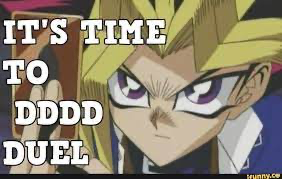

optional TODO:: play this game with your friend or roommate.

Crush your opponent, hold nothing back, just for this once. Even if this means sinking your friendship.

Paste your game history here.